In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [21]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [34]:
data.head(20)

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.50000,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.50000,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.50000,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.50000,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.50000,49.09998,45.200001,5
5,4601,Evit000,Cu000,1,26.50000,55.39999,56.900002,6
6,4601,Evit000,Cu000,1,26.50000,59.59998,71.700005,7
7,4601,Evit000,Cu000,1,26.50000,67.00000,86.800001,8
8,4601,Evit000,Cu000,1,26.50000,76.59998,104.900002,9
9,4601,Evit000,Cu000,1,26.50000,86.50000,123.000000,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pig     861 non-null    int64  
 1   Evit    861 non-null    object 
 2   Cu      861 non-null    object 
 3   Litter  861 non-null    int64  
 4   Start   861 non-null    float64
 5   Weight  861 non-null    float64
 6   Feed    789 non-null    float64
 7   Time    861 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 53.9+ KB


<AxesSubplot:xlabel='count', ylabel='Pig'>

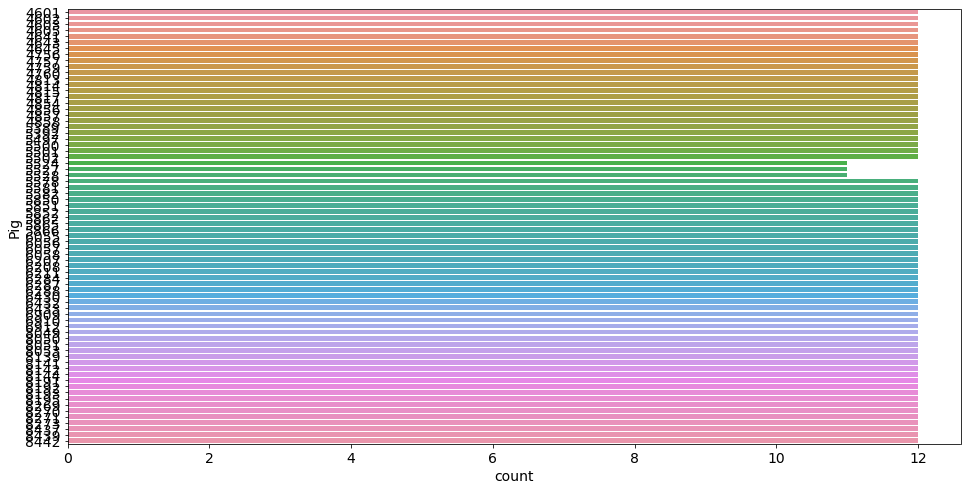

In [22]:
sns.countplot(y='Pig', data=data)

<AxesSubplot:xlabel='Time', ylabel='Weight'>

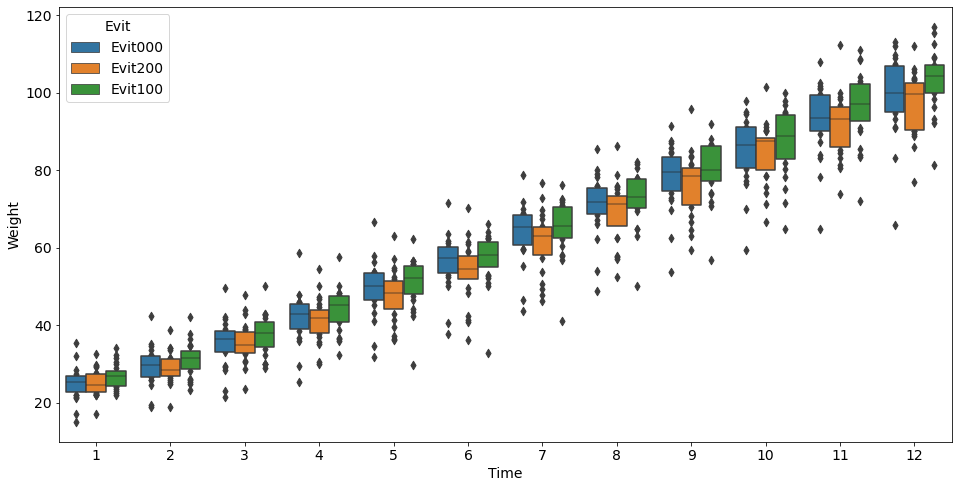

In [24]:
sns.boxenplot(x='Time', y='Weight', hue='Evit', data=data)

<AxesSubplot:xlabel='Time', ylabel='Weight'>

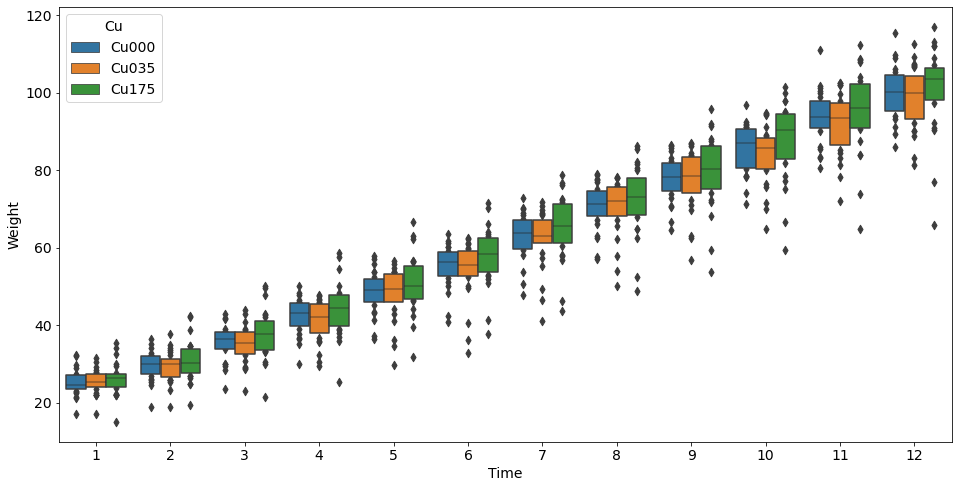

In [25]:
sns.boxenplot(x='Time', y='Weight', hue='Cu', data=data)

<AxesSubplot:xlabel='Time', ylabel='Weight'>

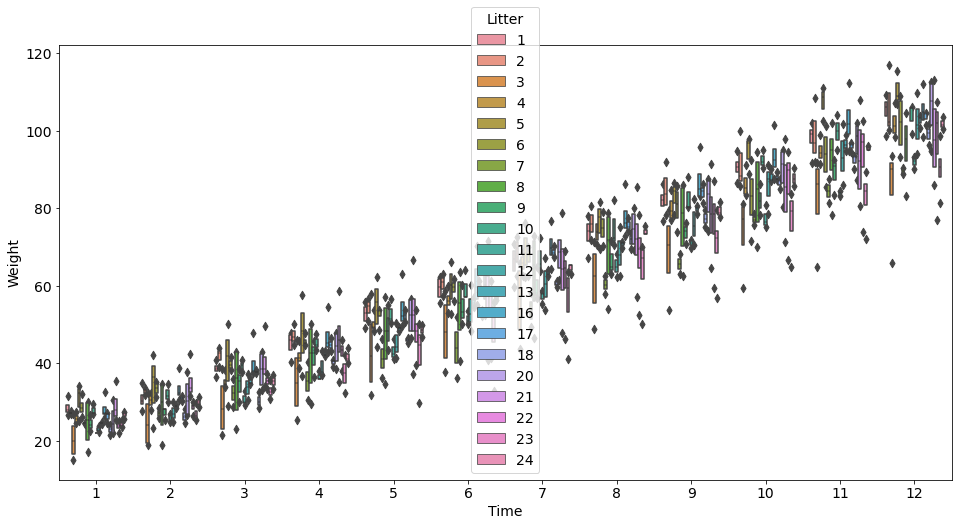

In [35]:
sns.boxenplot(x='Time', y='Weight', hue='Litter', data=data)

<AxesSubplot:xlabel='Evit', ylabel='count'>

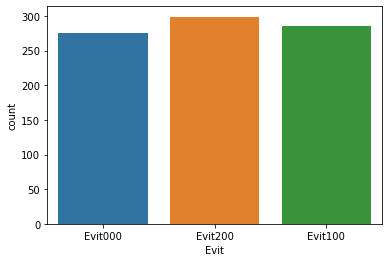

In [7]:
sns.countplot(x='Evit', data=data)

<AxesSubplot:xlabel='Cu', ylabel='count'>

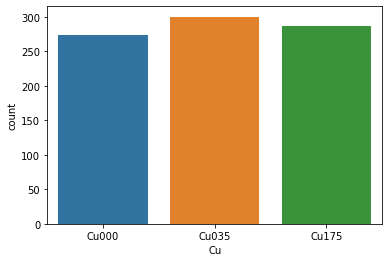

In [8]:
sns.countplot(x='Cu', data=data)

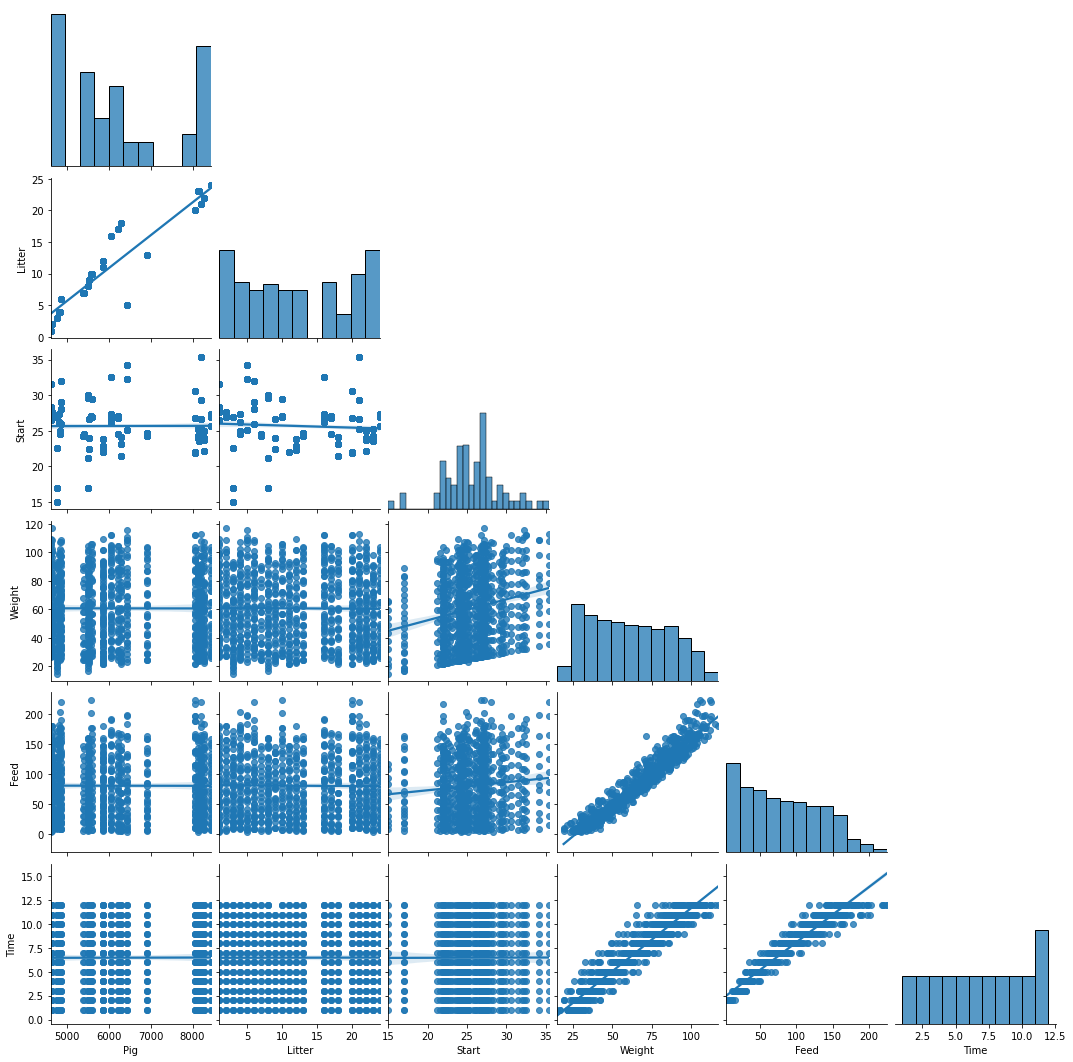

In [6]:
sns.pairplot(data, kind='reg', corner=True)

<AxesSubplot:xlabel='Time', ylabel='Weight'>

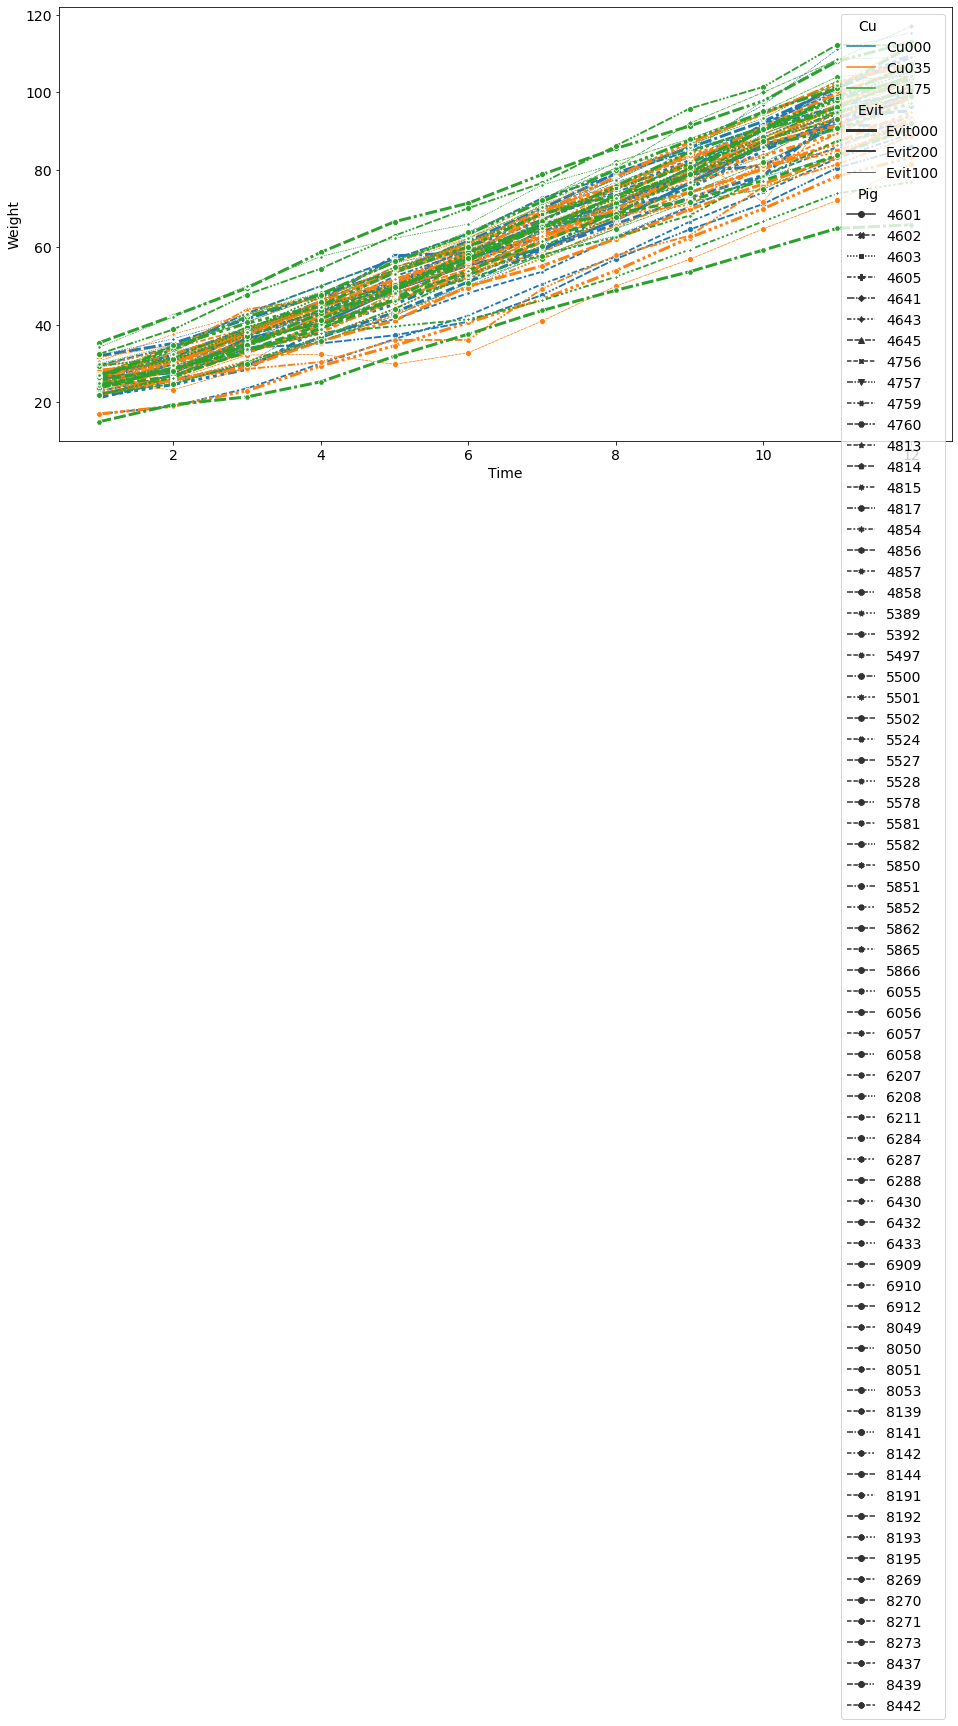

In [32]:
sns.lineplot(x='Time', y='Weight', style='Pig', size='Evit', hue='Cu',markers=True, data=data)

sns.lineplot??

In [2]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            



Next we fit a model with two random effects for each animal: a random intercept, and a random slope (with respect to time). This means that each pig may have a different baseline weight, as well as growing at a different rate. 

The formula specifies that “Time” is a covariate with a random coefficient. 

By default, formulas always include an intercept (which could be suppressed here using “0 + Time” as the formula).

In [36]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           



The random intercept and random slope are only weakly correlated (0.294/19.493∗0.416‾‾‾‾‾‾‾‾‾‾‾‾‾‾√≈0.1). So next we fit a model in which the two random effects are constrained to be uncorrelated:

In [37]:
.294 / (19.493 * .416)**.5

0.10324316832591753

In [38]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"],
                  re_formula="~Time")
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2),
                                                                      np.eye(2))

mdf = md.fit(free=free, method=["lbfgs"])
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0283    
Min. group size:   11       Log-Likelihood:      -2217.3481
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.554 28.388 0.000 14.652 16.825
Time              6.939    0.080 86.248 0.000  6.781  7.097
Group Var        19.837    1.571                           
Group x Time Cov  0.000    0.000                           
Time Var          0.423    0.033                           



The likelihood drops by 0.3 when we fix the correlation parameter to 0. 

Comparing 2 x 0.3 = 0.6 to the chi^2 1 df reference distribution suggests that the data are very consistent with a model in which this parameter is equal to 0.

# Sitka growth data
This is one of the example data sets provided in the LMER R library. 
The outcome variable is the size of the tree, and the covariate used here is a time value. 

The data are grouped by tree.

In [39]:
data = sm.datasets.get_rdataset("Sitka", "MASS").data
endog = data["size"]
data["Intercept"] = 1
exog = data[["Intercept", "Time"]]

Here is the statsmodels LME fit for a basic model with a random intercept. We are passing the endog and exog data directly to the LME init function as arrays. Also note that endog_re is specified explicitly in argument 4 as a random intercept (although this would also be the default if it were not specified).

In [40]:
md = sm.MixedLM(endog, exog, groups=data["tree"], exog_re=exog["Intercept"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Log-Likelihood:     -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           



We can now try to add a random slope. We start with R this time. From the code and output below we see that the REML estimate of the variance of the random slope is nearly zero.

In [41]:
exog_re = exog.copy()
md = sm.MixedLM(endog, exog, data["tree"], exog_re)
mdf = md.fit()
print(mdf.summary())

/Users/seanreed1/miniconda/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    size    
No. Observations:    395        Method:                REML    
No. Groups:          79         Scale:                 0.0264  
Min. group size:     5          Log-Likelihood:        -62.4834
Max. group size:     5          Converged:             Yes     
Mean group size:     5.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.273    0.101 22.513 0.000  2.075  2.471
Time                  0.013    0.000 33.888 0.000  0.012  0.013
Intercept Var         0.646    0.914                           
Intercept x Time Cov -0.001    0.003                           
Time Var              0.000    0.000                           



We can further explore the random effects structure by constructing plots of the profile likelihoods. We start with the random intercept, generating a plot of the profile likelihood from 0.1 units below to 0.1 units above the MLE. Since each optimization inside the profile likelihood generates a warning (due to the random slope variance being close to zero), we turn off the warnings here.

In [42]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    likev = mdf.profile_re(0, 're', dist_low=0.1, dist_high=0.1)

Here is a plot of the profile likelihood function. We multiply the log-likelihood difference by 2 to obtain the usual 𝜒2 reference distribution with 1 degree of freedom.

Text(0, 0.5, '-2 times profile log likelihood')

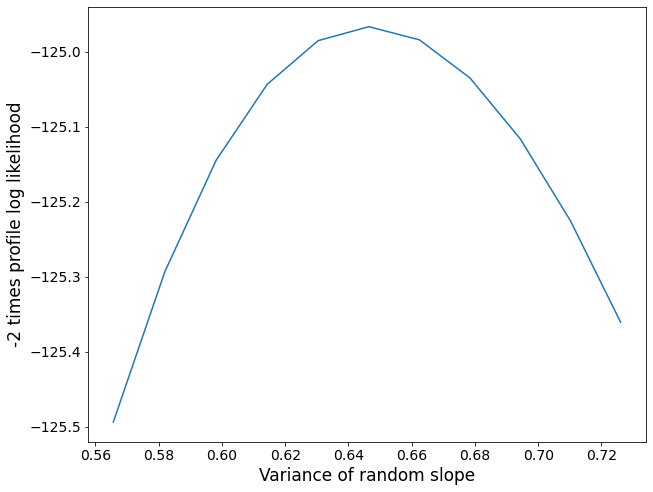

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
plt.ylabel("-2 times profile log likelihood", size=17)

Here is a plot of the profile likelihood function. The profile likelihood plot shows that the MLE of the random slope variance parameter is a very small positive number, and that there is low uncertainty in this estimate.

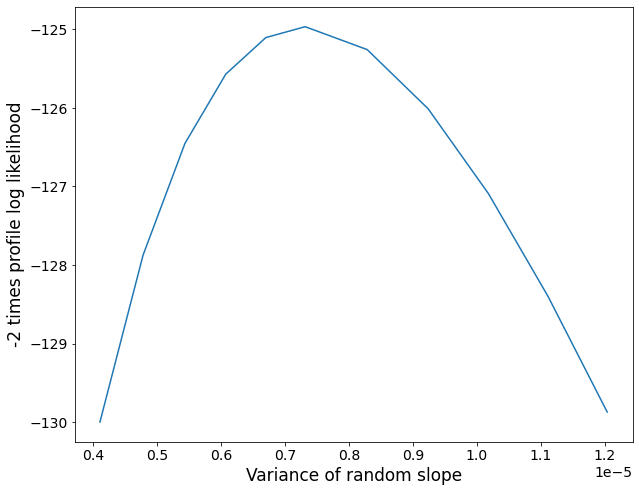

In [45]:
re = mdf.cov_re.iloc[1, 1]
with warnings.catch_warnings():
    # Parameter is often on the boundary
    warnings.simplefilter("ignore")
    likev = mdf.profile_re(1, 're', dist_low=.5*re, dist_high=0.8*re)

plt.figure(figsize=(10, 8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
lbl = plt.ylabel("-2 times profile log likelihood", size=17)